# 1.Import library and dataset

In [49]:
#import library ที่จำเป็น
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay

In [50]:
# import dataset
telco_data = pd.read_csv('C:/Users/User/Desktop/CS403/WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns',None)
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
#ตรวจสอบขนาดของ dataset
telco_data.shape

(7043, 21)

In [52]:
#ตรวจสอบประเภทของข้อมูล
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2.Data Cleansing

In [53]:
#check null value
telco_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [54]:
#copy telco_data to df
df = telco_data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
#หา customerID ที่ซ้ำกัน
duplicated_id = df['customerID'].duplicated().sum()
duplicated_id

0

In [56]:
#ลบ column customerID 
df = df.drop(['customerID'],axis=1)

In [57]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [58]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [59]:
#เปลี่ยน type ของ TotalCharges จาก obeject เป็นตัวเลข
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [60]:
#หลังจากเปลี่ยน TotalCharges ให้เป็น float แล้วก็ตรวจสอบหา null value อีกรอบ
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [61]:
missing_value = df[df['TotalCharges'].isnull()]
missing_value

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [62]:
# drop แถวข้อมูลที่มีค่า totalcharges เป็น null
df = df.dropna()
df = df.reset_index(drop=True)

In [63]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [64]:
df.shape

(7032, 20)

In [65]:
#เปลี่ยน column 'SeniorCitizen' ให้เป็น Object
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [66]:
#เปลี่ยน target 'Churn' ให้เป็น int
pd.set_option('future.no_silent_downcasting', False)
df['Churn'] = df['Churn'].replace({'No':0,'Yes':1})
df['Churn'] = df['Churn'].astype('int64')

C:\Users\User\AppData\Local\Temp\ipykernel_22588\29022699.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'No':0,'Yes':1})


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


# 3.Exploratory Data Analysis (EDA)

### หลังจากทำความสะอาดข้อมูลเสร็จก็ทำการสำรวจข้อมูลโดยการสร้างกราฟเพื่อให้เห็นภาพรวมของข้อมูลมากยิ่งขึ้น

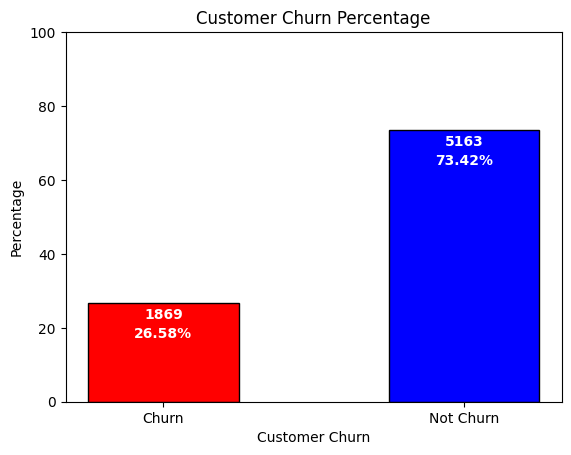

In [68]:
#สร้างกราฟแท่งเพื่อดูสัดส่วนของ churn rate
churn_count = (df['Churn']==1).sum()
not_churn_count = (df['Churn']==0).sum()

churn_percentage = (df['Churn'] == 1).value_counts()*100 / len(df['Churn'])
not_churn_percentage = (df['Churn'] == 0).value_counts()*100 / len(df['Churn'])

labels = ['Churn', 'Not Churn']
values_num = [churn_count, not_churn_count]
values_percentage = [churn_percentage[True], not_churn_percentage[True]]
plt.bar(labels, values_percentage, width=0.5,color=['red', 'blue'],edgecolor = 'black')

values_percentage_round = [round(values_percentage[0],2),round(values_percentage[1],2)]
for i in range(len(labels)):
    plt.text(i,values_percentage[i] - 10, f'{values_percentage_round[i]}' + "%", ha='center', va='bottom', color='white', weight='bold')
    plt.text(i,values_percentage[i] - 5, f'{values_num[i]}', ha='center', va='bottom', color='white', weight='bold')


plt.xlabel('Customer Churn')
plt.ylabel('Percentage')
plt.title('Customer Churn Percentage')
plt.ylim(0, 100)
plt.show()

### Tenure

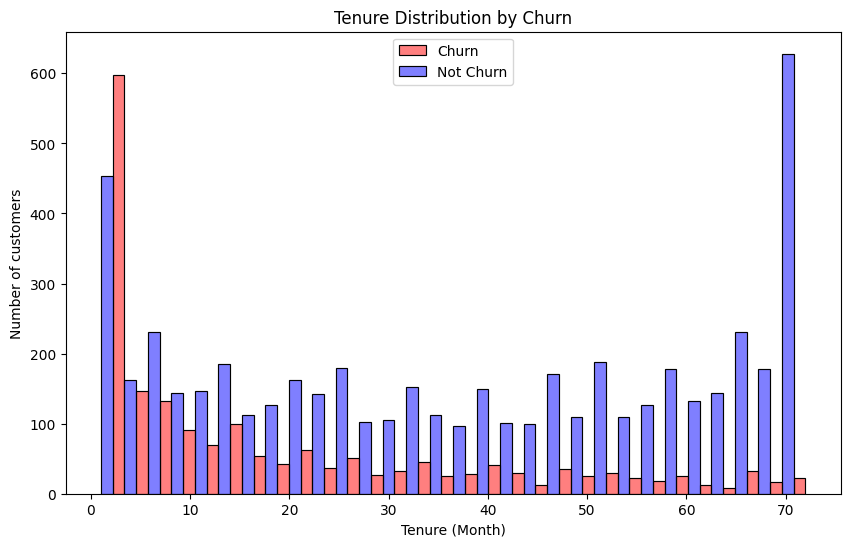

In [69]:
# สร้าง Histogram โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='tenure',hue='Churn',bins=30,palette=['blue','red'],alpha=0.5,multiple='dodge')

# เพิ่มรายละเอียดกราฟ
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (Month)')
plt.ylabel('Number of customers')
plt.legend(['Churn','Not Churn'])
plt.show()

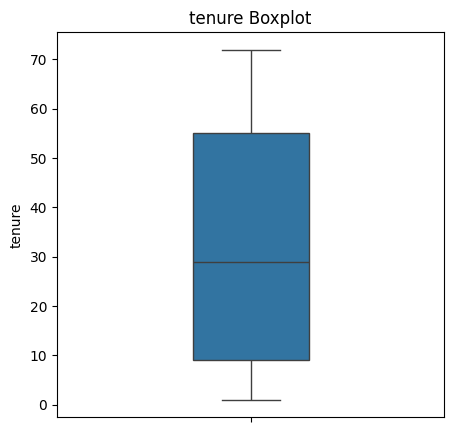

In [70]:
plt.figure(figsize=(5,5,))
sns.boxplot(data=df['tenure'],width=0.3)
plt.title('tenure Boxplot')
plt.ylabel('tenure')
plt.show()

### MonthlyCharges

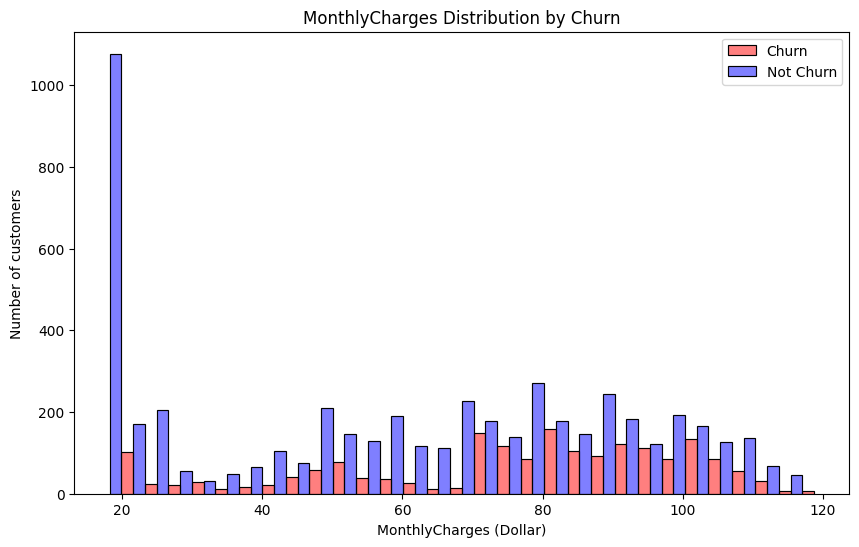

In [71]:
# สร้าง Histogram โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='MonthlyCharges',hue='Churn',bins=30,palette=['blue','red'],alpha=0.5,multiple='dodge')

#กำหนดรายละเอียดของกราฟ
plt.title('MonthlyCharges Distribution by Churn')
plt.xlabel('MonthlyCharges (Dollar)')
plt.ylabel('Number of customers')
plt.legend(['Churn','Not Churn'])
plt.show()

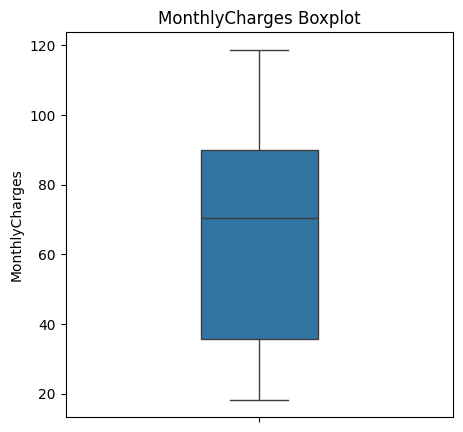

In [72]:
plt.figure(figsize=(5,5,))
sns.boxplot(data=df['MonthlyCharges'],width=0.3)
plt.title('MonthlyCharges Boxplot')
plt.ylabel('MonthlyCharges')
plt.show()

### TotalCharges

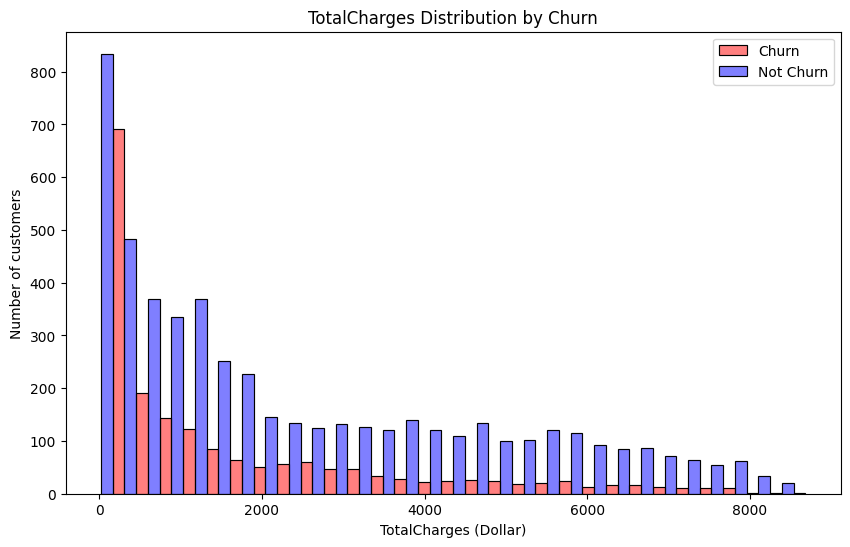

In [73]:
# สร้าง Histogram โดยใช้ Seaborn
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='TotalCharges',hue='Churn',bins=30,palette=['blue','red'],alpha=0.5,multiple='dodge')

#กำหนดรายละเอียดของกราฟ
plt.title('TotalCharges Distribution by Churn')
plt.xlabel('TotalCharges (Dollar)')
plt.ylabel('Number of customers')
plt.legend(['Churn','Not Churn'])
plt.show()

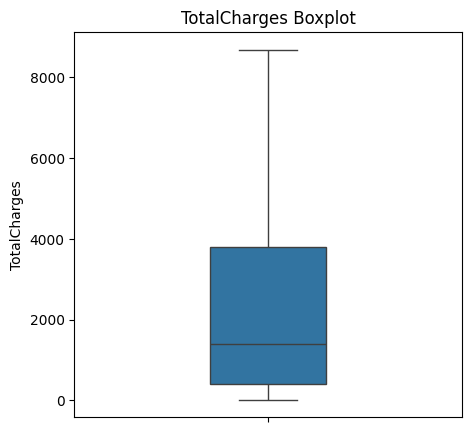

In [74]:
plt.figure(figsize=(5,5,))
sns.boxplot(data=df['TotalCharges'],width=0.3)
plt.title('TotalCharges Boxplot')
plt.ylabel('TotalCharges')
plt.show()

# 4.One hot encoding

In [75]:
#เริ่มโดยการกำหนดสร้าง list ที่เก็บ column ที่เป็น categorical data ยกเว้น Churn ที่เป็น Label
categorical_features = [col for col in df.select_dtypes(include=['object']).columns if col != 'Churn']
numerical_features = [col for col in df.select_dtypes(include=['int64','float64']).columns if col != 'Churn']

In [76]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [77]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [78]:
df[categorical_features]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7028,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7029,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7030,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [79]:
df[numerical_features]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7027,24,84.80,1990.50
7028,72,103.20,7362.90
7029,11,29.60,346.45
7030,4,74.40,306.60


In [80]:
#เริ่มสร้าง one hot encoder
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder = encoder.fit_transform(df[categorical_features])
one_hot_df = pd.DataFrame(one_hot_encoder, columns=encoder.get_feature_names_out(categorical_features))

#รวมข้อมูลที่ผ่าน encode กับข้อมูลเดิมเข้าด้วยกัน
df_encoded = pd.concat([df, one_hot_df], axis=1)

#drop categorical column ที่อยู่ในข้อมูลเดิมทิ้ง
df_encoded = df_encoded.drop(categorical_features, axis=1)

In [81]:
#dataset ใหม่ที่ผ่านการ encode เรียบร้อยแล้ว
df_encoded

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,34,56.95,1889.50,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,53.85,108.15,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,45,42.30,1840.75,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,2,70.70,151.65,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24,84.80,1990.50,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,72,103.20,7362.90,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,11,29.60,346.45,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,4,74.40,306.60,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [82]:
df_encoded.shape

(7032, 47)

In [83]:
df_encoded.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One yea

# 5.Normalization

In [84]:
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.280248,-1.161694,-0.994194,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.064303,-0.260878,-0.173740,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-1.239504,-0.363923,-0.959649,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.512486,-0.747850,-0.195248,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-1.239504,0.196178,-0.940457,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [85]:
df_encoded[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.126643e-16,6.062651e-17,-1.119064e-16
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,9.199259e-01,8.331482e-01,6.668271e-01
max,1.612573e+00,1.793381e+00,2.824261e+00


# 6.Handling with imbalance

### จากการทำ EDA จะสังเกตได้ว่าข้อมูลใน column "Churn" ซึ่งเป็น Label มีสัดส่วนที่แตกต่างกันค่อนข้างมากโดยคิดเป็นประมาณ 70:30 ทำให้จำเป็นต้องมีการจัดการ imbalance เสียก่อนเพื่อให้สามารถสร้าง model ทำนายได้แม่นยำมากยิ่งขึ้น

### 1.Normal (ข้อมูลดั้งเดิม)

In [86]:
# แบ่งข้อมูลโดยให้ features อยู่ใน X และ Label อยู่ใน y
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print("y: ",y.value_counts())

y:  Churn
0    5163
1    1869
Name: count, dtype: int64


### 2.Random Oversampling

In [87]:
#Random Oversampling before train test split
rand = RandomOverSampler(random_state=0)
X_resample, y_resample = rand.fit_resample(X,y)

print("y_resample: ",y_resample.value_counts())

y_resample:  Churn
0    5163
1    5163
Name: count, dtype: int64


### 3.Smote

In [88]:
#SMOTE before train test split
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X,y)
print("y_smote: ",y_smote.value_counts())

y_smote:  Churn
0    5163
1    5163
Name: count, dtype: int64


### 4.Random Undersampling

In [89]:
#Random Undersampling
under = RandomUnderSampler(random_state=0)
X_under, y_under = under.fit_resample(X,y)
print("Y_under:",y_under.value_counts())

Y_under: Churn
0    1869
1    1869
Name: count, dtype: int64


# 7.Train Test Split Data

### คือการแบ่งชุดข้อมูลออกเป็น 2 ส่วน คือ test set และ train set เพื่อใช้ในการฝึกและประเมินประสิทธิภาพในการทำนายของ classification model 

In [90]:
#train test split data โดยแบ่งสัดส่วน train:test เป็น 70:30
#กรณีที่ใช้ข้อมูลดั้งเดิม

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print("y_train: ",y_train.value_counts())
print("y_test: ",y_test.value_counts())

y_train:  Churn
0    3608
1    1314
Name: count, dtype: int64
y_test:  Churn
0    1555
1     555
Name: count, dtype: int64


In [91]:
#กรณีที่ใช้ Random Oversampling

X_resample_train, X_resample_test, y_resample_train, y_resample_test = train_test_split(X_resample,y_resample,test_size=0.3,random_state=0)
print("y_resample_train: ",y_resample_train.value_counts())
print("y_resample_test: ",y_resample_test.value_counts())

y_resample_train:  Churn
0    3621
1    3607
Name: count, dtype: int64
y_resample_test:  Churn
1    1556
0    1542
Name: count, dtype: int64


In [92]:
#กรณีที่ใช้ SMOTE

X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote,y_smote,test_size=0.3,random_state=0)
print("y_smote_train: ",y_smote_train.value_counts())
print("y_smote_test: ",y_smote_test.value_counts())

y_smote_train:  Churn
0    3621
1    3607
Name: count, dtype: int64
y_smote_test:  Churn
1    1556
0    1542
Name: count, dtype: int64


In [93]:
# กรณีที่ใช้ Undersampling
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size=0.3,random_state=0)
print("y_smote_train: ",y_under_train.value_counts())
print("y_smote_test: ",y_under_test.value_counts())

y_smote_train:  Churn
1    1308
0    1308
Name: count, dtype: int64
y_smote_test:  Churn
1    561
0    561
Name: count, dtype: int64


# 8.Modelling + Confusion Matrix

### สร้างโมเดลทำนายเพื่อทำนายการยกเลิกใช้บริการของลูกค้าและประเมินประสิทธิภาพในการทำนายด้วย Confusion Matrix

## Random Forest

### 1.Normal (ข้อมูลดั้งเดิม)

In [94]:
#normal
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Test set accuracy: {:.4f}".format(rf.score(X_test,y_test)))

Test set accuracy: 0.7877


In [95]:
print("Test set preictions: {}".format(y_pred))
print(classification_report(y_test,y_pred,digits=4))

Test set preictions: [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0     0.8262    0.9016    0.8622      1555
           1     0.6295    0.4685    0.5372       555

    accuracy                         0.7877      2110
   macro avg     0.7279    0.6850    0.6997      2110
weighted avg     0.7744    0.7877    0.7767      2110



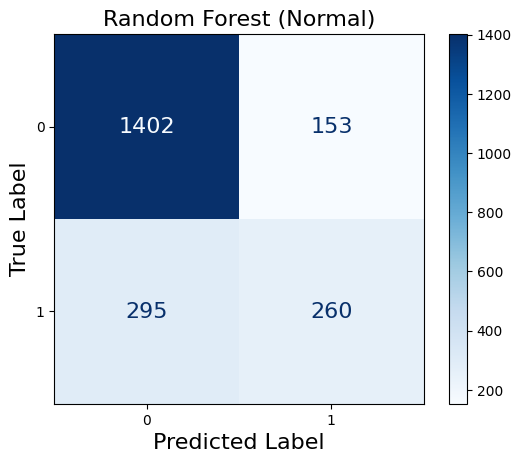

In [96]:
#Confusion Matrix ของ Random Forest โดยใช้ข้อมูลเดิม
cm_rf = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap="Blues")
for text in disp.text_.ravel():
    text.set_fontsize(16)

plt.title('Random Forest (Normal)',fontsize=16)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)
plt.show()

### 2.Random Oversampling

In [97]:
#oversampling
rf_over = RandomForestClassifier(random_state = 0)
rf_over.fit(X_resample_train, y_resample_train)
y_pred = rf_over.predict(X_resample_test)
print("Test set accuracy: {:.4f}".format(rf_over.score(X_resample_test,y_resample_test)))

Test set accuracy: 0.8877


In [98]:
print("Test set preictions: {}".format(y_pred))
print(classification_report(y_resample_test,y_pred,digits=4))

Test set preictions: [0 0 0 ... 0 0 1]
              precision    recall  f1-score   support

           0     0.9377    0.8294    0.8802      1542
           1     0.8483    0.9454    0.8942      1556

    accuracy                         0.8877      3098
   macro avg     0.8930    0.8874    0.8872      3098
weighted avg     0.8928    0.8877    0.8873      3098



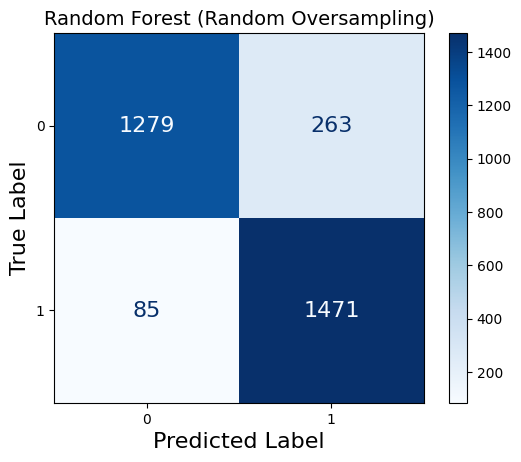

In [99]:
#Confusion Matrix ของ Random Forest โดยใช้ข้อมูล Random Oversampling
cm_rf_over = confusion_matrix(y_resample_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_over)
disp.plot(cmap="Blues")
for text in disp.text_.ravel():
    text.set_fontsize(16)

plt.title('Random Forest (Random Oversampling)',fontsize=14)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)
plt.show()

### 3.Smote

In [100]:
#smote
rf_smote = RandomForestClassifier(random_state = 0)
rf_smote.fit(X_smote_train, y_smote_train)
y_pred = rf_smote.predict(X_smote_test)
print("Test set accuracy: {:.4f}".format(rf_smote.score(X_smote_test,y_smote_test)))

Test set accuracy: 0.8570


In [101]:
print("Test set preictions: {}".format(y_pred))
print(classification_report(y_smote_test,y_pred,digits=4))

Test set preictions: [0 0 0 ... 0 0 1]
              precision    recall  f1-score   support

           0     0.8599    0.8515    0.8557      1542
           1     0.8542    0.8625    0.8583      1556

    accuracy                         0.8570      3098
   macro avg     0.8570    0.8570    0.8570      3098
weighted avg     0.8570    0.8570    0.8570      3098



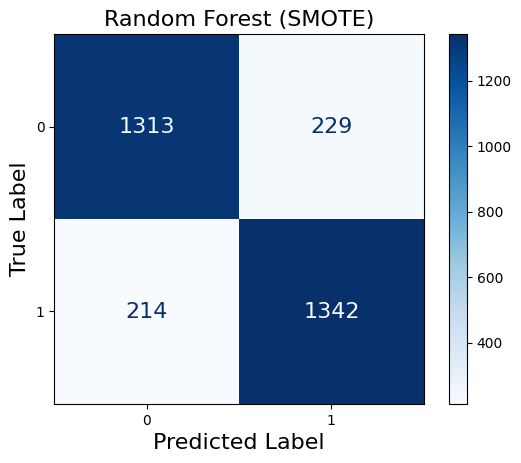

In [102]:
#Confusion Matrix ของ Random Forest โดยใช้ข้อมูล SMOTE
cm_rf_smote = confusion_matrix(y_smote_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_smote)
disp.plot(cmap="Blues")
for text in disp.text_.ravel():
    text.set_fontsize(16)

plt.title('Random Forest (SMOTE)',fontsize=16)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)
plt.show()

### 4.Random Undersampling

In [103]:
#Random Undersampling
rf_under = RandomForestClassifier(random_state = 0)
rf_under.fit(X_under_train, y_under_train)
y_pred = rf_under.predict(X_under_test)
print("Test set accuracy: {:.4f}".format(rf_under.score(X_under_test,y_under_test)))

Test set accuracy: 0.7273


In [104]:
print("Test set preictions: {}".format(y_pred))
print(classification_report(y_under_test,y_pred,digits=4))

Test set preictions: [1 1 1 ... 0 0 0]
              precision    recall  f1-score   support

           0     0.7273    0.7273    0.7273       561
           1     0.7273    0.7273    0.7273       561

    accuracy                         0.7273      1122
   macro avg     0.7273    0.7273    0.7273      1122
weighted avg     0.7273    0.7273    0.7273      1122



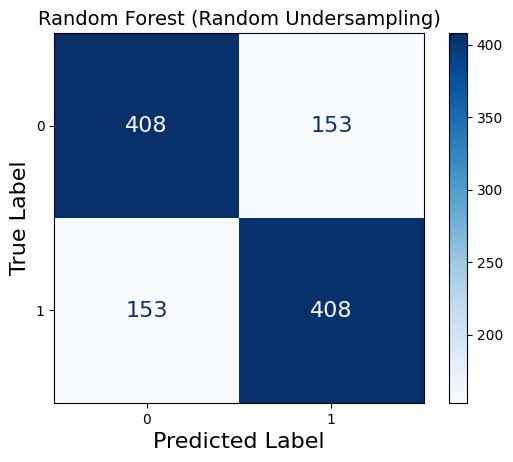

In [105]:
#Confusion Matrix ของ Random Forest โดยใช้ข้อมูล Random Undersampling
cm_rf_under = confusion_matrix(y_under_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_under)
disp.plot(cmap="Blues")
for text in disp.text_.ravel():
    text.set_fontsize(16)

plt.title('Random Forest (Random Undersampling)',fontsize=14)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)
plt.show()

## XGB

### 1.Normal (ข้อมูลดั้งเดิม)

In [106]:
#normal
xgb_clf = xgb.XGBClassifier(random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print("Test set accuracy: {:.4f}".format(xgb_clf.score(X_test,y_test)))

Test set accuracy: 0.7848


In [107]:
print("Test set preictions: {}".format(y_pred))
print(classification_report(y_test,y_pred,digits=4))

Test set preictions: [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0     0.8322    0.8868    0.8587      1555
           1     0.6115    0.4991    0.5496       555

    accuracy                         0.7848      2110
   macro avg     0.7219    0.6930    0.7041      2110
weighted avg     0.7742    0.7848    0.7774      2110



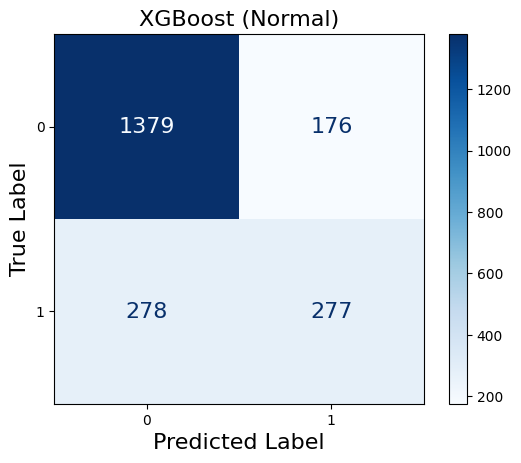

In [108]:
#Confusion Matrix ของ XGB โดยใช้ข้อมูลเดิม
cm_xgb = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp.plot(cmap="Blues")
for text in disp.text_.ravel():
    text.set_fontsize(16)

plt.title('XGBoost (Normal)',fontsize=16)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)
plt.show()

### 2.Random Oversampling

In [109]:
#oversampling
xgb_clf_over = xgb.XGBClassifier(random_state=0)
xgb_clf_over.fit(X_resample_train, y_resample_train)
y_pred = xgb_clf_over.predict(X_resample_test)
print("Test set accuracy: {:.4f}".format(xgb_clf_over.score(X_resample_test,y_resample_test)))

Test set accuracy: 0.8522


In [110]:
print("Test set preictions: {}".format(y_pred))
print(classification_report(y_resample_test,y_pred,digits=4))

Test set preictions: [0 0 0 ... 0 0 1]
              precision    recall  f1-score   support

           0     0.9021    0.7886    0.8415      1542
           1     0.8137    0.9152    0.8615      1556

    accuracy                         0.8522      3098
   macro avg     0.8579    0.8519    0.8515      3098
weighted avg     0.8577    0.8522    0.8515      3098



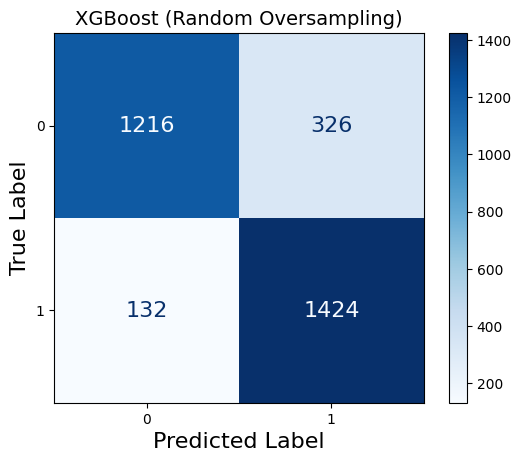

In [111]:
#Confusion Matrix ของ XGB โดยใช้ข้อมูล Random Oversampling
cm_xgb_over = confusion_matrix(y_resample_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_over)
disp.plot(cmap="Blues")
for text in disp.text_.ravel():
    text.set_fontsize(16)

plt.title('XGBoost (Random Oversampling)',fontsize=14)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)
plt.show()

### 3.SMOTE

In [112]:
#smote
xgb_clf_smote = xgb.XGBClassifier(random_state=0)
xgb_clf_smote.fit(X_smote_train, y_smote_train)
y_pred = xgb_clf_smote.predict(X_smote_test)
print("Test set accuracy: {:.4f}".format(xgb_clf_smote.score(X_smote_test,y_smote_test)))

Test set accuracy: 0.8583


In [113]:
print("Test set preictions: {}".format(y_pred))
print(classification_report(y_smote_test,y_pred,digits=4))

Test set preictions: [0 0 0 ... 0 0 1]
              precision    recall  f1-score   support

           0     0.8612    0.8528    0.8570      1542
           1     0.8555    0.8638    0.8596      1556

    accuracy                         0.8583      3098
   macro avg     0.8583    0.8583    0.8583      3098
weighted avg     0.8583    0.8583    0.8583      3098



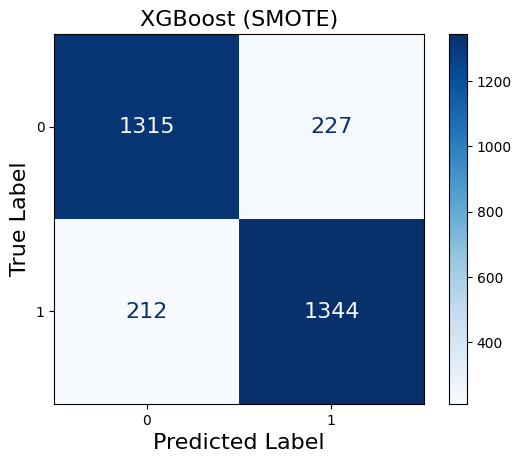

In [114]:
#Confusion Matrix ของ Random Forest โดยใช้ข้อมูล SMOTE
cm_xgb_smote = confusion_matrix(y_smote_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_smote)
disp.plot(cmap="Blues")
for text in disp.text_.ravel():
    text.set_fontsize(16)

plt.title('XGBoost (SMOTE)',fontsize=16)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)
plt.show()

### 4.Random Undersampling

In [115]:
#Random Undersampling
xgb_clf_under =  xgb.XGBClassifier(random_state = 0)
xgb_clf_under.fit(X_under_train, y_under_train)
y_pred = xgb_clf_under.predict(X_under_test)
print("Test set accuracy: {:.4f}".format(xgb_clf_under.score(X_under_test,y_under_test)))

Test set accuracy: 0.7308


In [116]:
print("Test set preictions: {}".format(y_pred))
print(classification_report(y_under_test,y_pred,digits=4))

Test set preictions: [1 1 1 ... 0 0 0]
              precision    recall  f1-score   support

           0     0.7430    0.7059    0.7239       561
           1     0.7199    0.7558    0.7374       561

    accuracy                         0.7308      1122
   macro avg     0.7314    0.7308    0.7307      1122
weighted avg     0.7314    0.7308    0.7307      1122



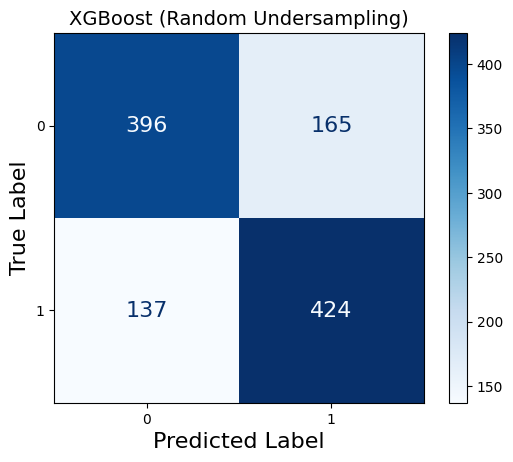

In [117]:
#Confusion Matrix ของ Random Forest โดยใช้ข้อมูล Random Undersampling
cm_xgb_under = confusion_matrix(y_under_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_under)
disp.plot(cmap="Blues")
for text in disp.text_.ravel():
    text.set_fontsize(16)

plt.title('XGBoost (Random Undersampling)',fontsize=14)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)
plt.show()

## SVM

### 1.Normal

In [118]:
#normal
svm_clf = svm.SVC(random_state=0,probability=True)
svm_clf.fit(X_train,y_train)
y_pred = svm_clf.predict(X_test)
print("Test set accuracy: {:.4f}".format(svm_clf.score(X_test,y_test)))

Test set accuracy: 0.7995


In [119]:
print("Test set preictions: {}".format(y_pred))
print(classification_report(y_test,y_pred,digits=4))

Test set preictions: [0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0     0.8318    0.9125    0.8703      1555
           1     0.6634    0.4829    0.5589       555

    accuracy                         0.7995      2110
   macro avg     0.7476    0.6977    0.7146      2110
weighted avg     0.7875    0.7995    0.7884      2110



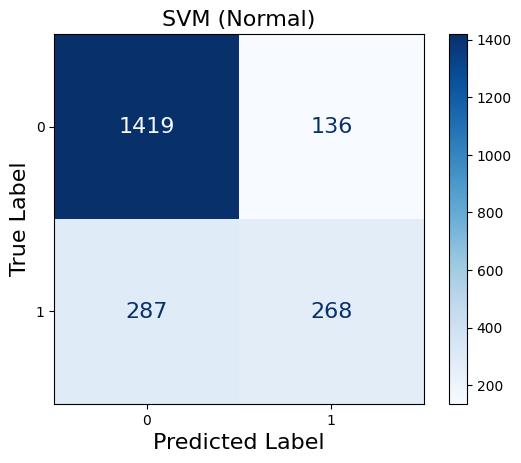

In [120]:
#Confusion Matrix ของ SVM โดยใช้ข้อมูลเดิม
cm_svm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot(cmap="Blues")
for text in disp.text_.ravel():
    text.set_fontsize(16)

plt.title('SVM (Normal)',fontsize=16)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)
plt.show()

### 2.Random Oversampling

In [121]:
#oversampling
svm_clf_over = svm.SVC(random_state=0,probability=True)
svm_clf_over.fit(X_resample_train,y_resample_train)
y_pred = svm_clf_over.predict(X_resample_test)
print("Test set accuracy: {:.4f}".format(svm_clf_over.score(X_resample_test,y_resample_test)))

Test set accuracy: 0.7815


In [122]:
print("Test set preictions: {}".format(y_pred))
print(classification_report(y_resample_test,y_pred,digits=4))

Test set preictions: [0 0 1 ... 0 0 1]
              precision    recall  f1-score   support

           0     0.8010    0.7464    0.7727      1542
           1     0.7646    0.8162    0.7896      1556

    accuracy                         0.7815      3098
   macro avg     0.7828    0.7813    0.7811      3098
weighted avg     0.7827    0.7815    0.7812      3098



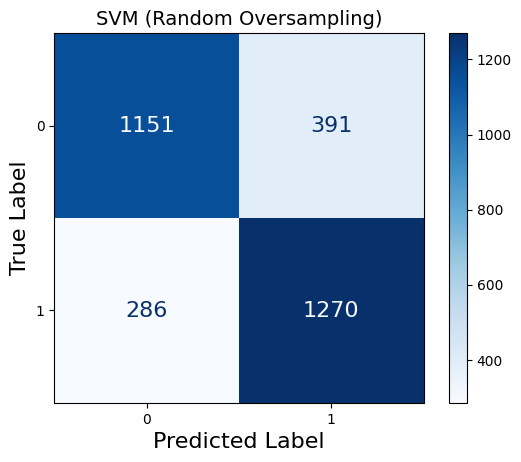

In [123]:
#Confusion Matrix ของ SVM โดยใช้ข้อมูล Random Oversampling
cm_svm_over = confusion_matrix(y_resample_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm_over)
disp.plot(cmap="Blues")
for text in disp.text_.ravel():
    text.set_fontsize(16)

plt.title('SVM (Random Oversampling)',fontsize=14)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)
plt.show()

### 3.Smote

In [124]:
#smote
svm_clf_smote = svm.SVC(random_state=0,probability=True)
svm_clf_smote.fit(X_smote_train,y_smote_train)
y_pred = svm_clf_smote.predict(X_smote_test)
print("Test set accuracy: {:.4f}".format(svm_clf_smote.score(X_smote_test,y_smote_test)))

Test set accuracy: 0.8118


In [125]:
print("Test set preictions: {}".format(y_pred))
print(classification_report(y_smote_test,y_pred,digits=4))

Test set preictions: [0 0 0 ... 0 0 1]
              precision    recall  f1-score   support

           0     0.8408    0.7672    0.8023      1542
           1     0.7877    0.8560    0.8204      1556

    accuracy                         0.8118      3098
   macro avg     0.8142    0.8116    0.8114      3098
weighted avg     0.8141    0.8118    0.8114      3098



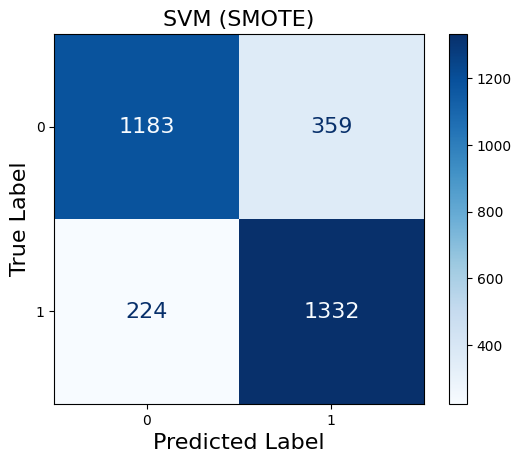

In [126]:
#Confusion Matrix ของ SVM โดยใช้ข้อมูล SMOTE
cm_svm_smote = confusion_matrix(y_smote_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm_smote)
disp.plot(cmap="Blues")
for text in disp.text_.ravel():
    text.set_fontsize(16)

plt.title('SVM (SMOTE)',fontsize=16)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)
plt.show()

### 4.Random Undersampling

In [127]:
#Random Undersampling
svm_clf_under = svm.SVC(random_state=0,probability=True)
svm_clf_under.fit(X_under_train,y_under_train)
y_pred = svm_clf_under.predict(X_under_test)
print("Test set accuracy: {:.4f}".format(svm_clf_under.score(X_under_test,y_under_test)))

Test set accuracy: 0.7433


In [128]:
print("Test set preictions: {}".format(y_pred))
print(classification_report(y_under_test,y_pred,digits=4))

Test set preictions: [1 1 1 ... 1 0 0]
              precision    recall  f1-score   support

           0     0.7661    0.7005    0.7318       561
           1     0.7241    0.7861    0.7538       561

    accuracy                         0.7433      1122
   macro avg     0.7451    0.7433    0.7428      1122
weighted avg     0.7451    0.7433    0.7428      1122



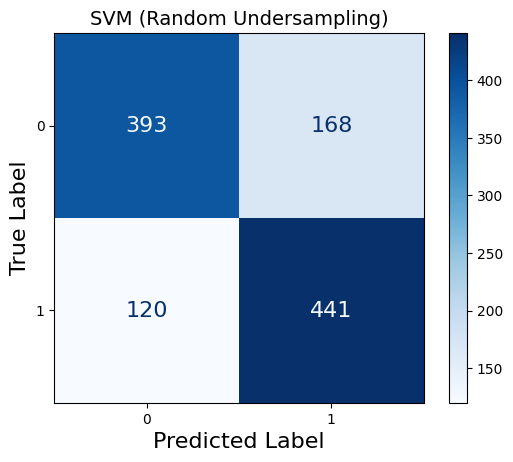

In [129]:
#Confusion Matrix ของ SVM โดยใช้ข้อมูล Random Oversampling
cm_svm_under = confusion_matrix(y_under_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm_under)
disp.plot(cmap="Blues")
for text in disp.text_.ravel():
    text.set_fontsize(16)

plt.title('SVM (Random Undersampling)',fontsize=14)
plt.xlabel('Predicted Label',fontsize=16)
plt.ylabel('True Label',fontsize=16)
plt.show()

# 9.ROC-AUC

### 1.Normal (ข้อมูลดั้งเดิม)

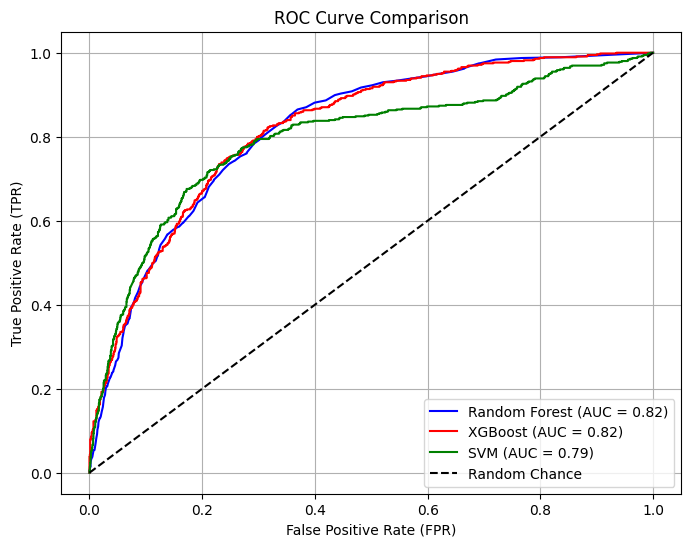

In [130]:
#ROC-AUC จากโมเดลที่ใช้ข้อมูลเดิม
#คำนวณค่าความน่าจะเป็น
rf_prob = rf.predict_proba(X_test)[:,1]
xgb_prob = xgb_clf.predict_proba(X_test)[:,1]
svm_prob = svm_clf.predict_proba(X_test)[:,1]

#คำนวณค่า ROC Curve
rf_fpr,rf_tpr,threshold = roc_curve(y_test,rf_prob)
svm_fpr,svm_tpr,threshold = roc_curve(y_test,svm_prob)
xgb_fpr,xgb_tpr,threshold = roc_curve(y_test,xgb_prob)

#คำนวณค่า AUC
rf_auc = auc(rf_fpr,rf_tpr)
svm_auc = auc(svm_fpr,svm_tpr)
xgb_auc = auc(xgb_fpr,xgb_tpr)

# วาดกราฟ ROC-AUC
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='blue')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='red')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='green')


plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### 2.Random Oversampling

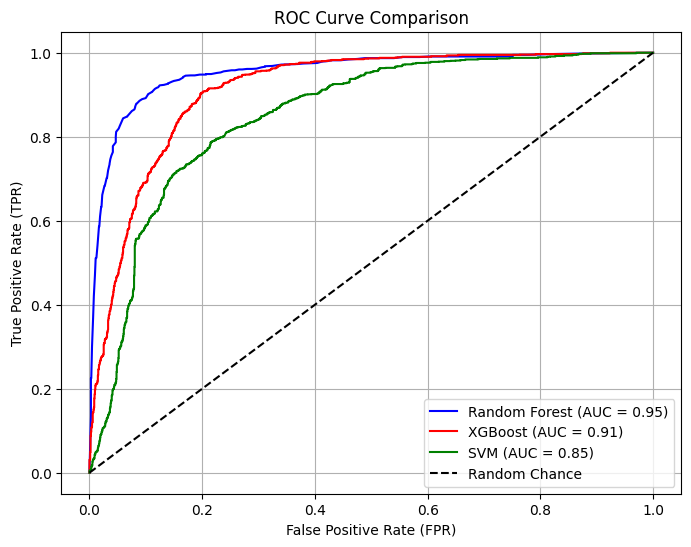

In [131]:
#ROC-AUC จากโมเดลที่ใช้ข้อมูลจาก Random Oversampling
#คำนวณค่าความน่าจะเป็น
rf_prob = rf_over.predict_proba(X_resample_test)[:,1]
xgb_prob = xgb_clf_over.predict_proba(X_resample_test)[:,1]
svm_prob = svm_clf_over.predict_proba(X_resample_test)[:,1]

#คำนวณค่า ROC Curve
rf_fpr,rf_tpr,threshold = roc_curve(y_resample_test,rf_prob)
svm_fpr,svm_tpr,threshold = roc_curve(y_resample_test,svm_prob)
xgb_fpr,xgb_tpr,threshold = roc_curve(y_resample_test,xgb_prob)

#คำนวณค่า AUC
rf_auc = auc(rf_fpr,rf_tpr)
svm_auc = auc(svm_fpr,svm_tpr)
xgb_auc = auc(xgb_fpr,xgb_tpr)

#กราฟ ROC-AUC
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='blue')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='red')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='green')


plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### 3.Smote

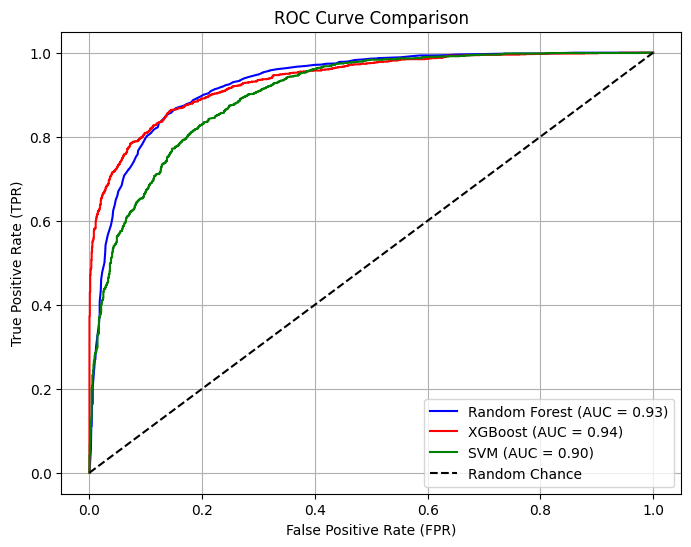

In [132]:
#ROC-AUC จากโมเดลที่ใช้ข้อมูลเดิม
#คำนวณค่าความน่าจะเป็น
rf_prob = rf_smote.predict_proba(X_smote_test)[:,1]
xgb_prob = xgb_clf_smote.predict_proba(X_smote_test)[:,1]
svm_prob = svm_clf_smote.predict_proba(X_smote_test)[:,1]

#คำนวณค่า ROC Curve
rf_fpr,rf_tpr,threshold= roc_curve(y_smote_test,rf_prob)
svm_fpr,svm_tpr,threshold = roc_curve(y_smote_test,svm_prob)
xgb_fpr,xgb_tpr,threshold = roc_curve(y_smote_test,xgb_prob)

#คำนวณค่า AUC
rf_auc = auc(rf_fpr,rf_tpr)
svm_auc = auc(svm_fpr,svm_tpr)
xgb_auc = auc(xgb_fpr,xgb_tpr)

# วาดกราฟ ROC-AUC
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='blue')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='red')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='green')



plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### 4.Random Undersampling

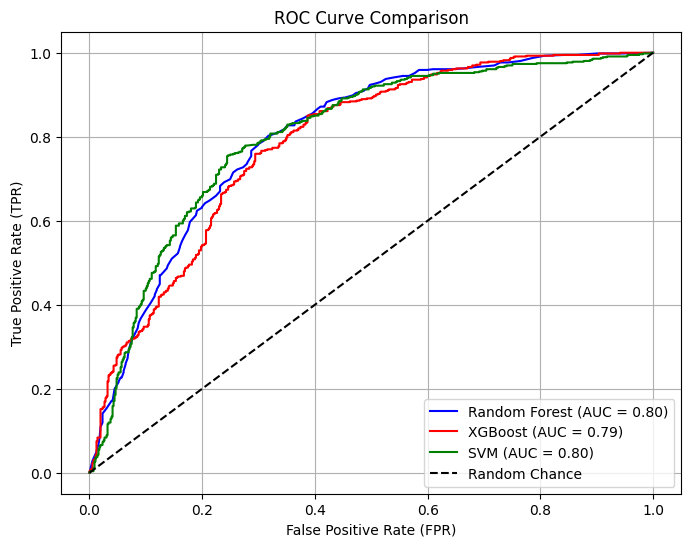

In [133]:
#ROC-AUC จากโมเดลที่ใช้ข้อมูลเดิม
#คำนวณค่าความน่าจะเป็น
rf_prob = rf_under.predict_proba(X_under_test)[:,1]
xgb_prob = xgb_clf_under.predict_proba(X_under_test)[:,1]
svm_prob = svm_clf_under.predict_proba(X_under_test)[:,1]

#คำนวณค่า ROC Curve
rf_fpr,rf_tpr,threshold= roc_curve(y_under_test,rf_prob)
svm_fpr,svm_tpr,threshold = roc_curve(y_under_test,svm_prob)
xgb_fpr,xgb_tpr,threshold = roc_curve(y_under_test,xgb_prob)

#คำนวณค่า AUC
rf_auc = auc(rf_fpr,rf_tpr)
svm_auc = auc(svm_fpr,svm_tpr)
xgb_auc = auc(xgb_fpr,xgb_tpr)

# วาดกราฟ ROC-AUC
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='blue')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='red')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color='green')



plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 10.Feature Importance

### ทำการหาว่าฟีเจอร์ที่สำคัญและส่งผลต่อการเลิกใช้บริการของลูกค้า

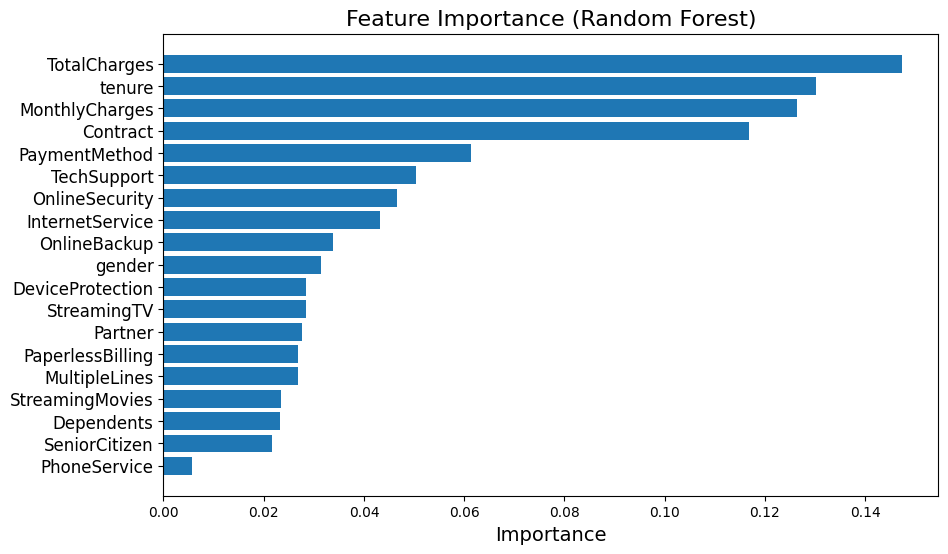

In [134]:
# ดึง Feature Importance ออกมาจากโมเดล
rf_importance = rf_over.feature_importances_
rf_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importance})

# กลุ่มคอลัมน์ที่เกี่ยวข้อง
groups = {
    'gender': ['gender_Female', 'gender_Male'],
    'SeniorCitizen': ['SeniorCitizen_No', 'SeniorCitizen_Yes'],
    'Partner': ['Partner_No', 'Partner_Yes'],
    'Dependents': ['Dependents_No', 'Dependents_Yes'],
    'PhoneService': ['PhoneService_No', 'PhoneService_Yes'],
    'MultipleLines': ['MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes'],
    'InternetService': ['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No'],
    'OnlineSecurity': ['OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes'],
    'OnlineBackup': ['OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes'],
    'DeviceProtection': ['DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes'],
    'TechSupport': ['TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes'],
    'StreamingTV': ['StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes'],
    'StreamingMovies': ['StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
    'Contract': ['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'],
    'PaperlessBilling': ['PaperlessBilling_No', 'PaperlessBilling_Yes'],
    'PaymentMethod': ['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
                      'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
}

# รวมค่า Importance ของกลุ่มต่างๆ
grouped_importance = {}
for group_name, columns in groups.items():
    grouped_importance[group_name] = rf_feature_importance[rf_feature_importance['Feature'].isin(columns)]['Importance'].sum()

# เพิ่ม Feature อื่นๆ ที่ไม่อยู่ในกลุ่ม
ungrouped_features = rf_feature_importance[~rf_feature_importance['Feature'].isin([col for cols in groups.values() for col in cols])]
for _, row in ungrouped_features.iterrows():
    grouped_importance[row['Feature']] = row['Importance']

# สร้าง DataFrame ใหม่หลังจากรวม
grouped_feature_importance = pd.DataFrame({
    'Feature': grouped_importance.keys(),
    'Importance': grouped_importance.values()
}).sort_values(by='Importance', ascending=True)

# สร้างกราฟใหม่
plt.figure(figsize=(10, 6))
plt.barh(grouped_feature_importance['Feature'], grouped_feature_importance['Importance'])
plt.xlabel('Importance', fontsize=14)
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks()
plt.show()